In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from datetime import date
import warnings
warnings.filterwarnings("ignore")


In [86]:
df = pd.read_excel('marketing_campaign.xlsx')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,1,0,0,0,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,0,0,1,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [87]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp1            0
AcceptedCmp2            0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [88]:
# Filling missing Income values with column mean
df['Income'] = df['Income'].fillna(df['Income'].mean())

In [89]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp1           0
AcceptedCmp2           0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [90]:
duplicate = df.duplicated()
duplicate

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Length: 2240, dtype: bool

In [91]:
duplicate.sum()

0

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [93]:
# We will create five variables :

# Variable __*Spending*__ as the sum of the amount spent on the 6 product categories
# Variable __*Seniority*__ as the number of months the customer is enrolled with the company
# Variable __*'No_of_Visits&Purchase'*__as the sum of the visits and purchase made online as well as offline
# Variable __*'Accepted_offers'*__as the sum of all 5 Marketing campaign
# Variable __*'home_members'*__as the sum of Kidhome & Teenhome

In [94]:
#Spending variable creation
df['Spending']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']
+df['MntGoldProds']

#No_of_Visits&Purchase variable creation
df['No_of_Visits_and_Purchase']=df['NumDealsPurchases']+df['NumWebPurchases']+df['NumCatalogPurchases']
+df['NumStorePurchases']+df['NumWebVisitsMonth']

#Accepted_offers variable creation
df['Accepted_offers']=df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']

#person@home variable creation
df['home_members']=df['Kidhome']+df['Teenhome']

#Seniority variable creation
last_date = date(2014,10, 4)
df['Seniority']=pd.to_datetime(df['Dt_Customer'], dayfirst=True,format = '%Y-%m-%d')
df['Seniority'] = pd.to_numeric(df['Seniority'].dt.date.apply(lambda x: (last_date - x)).dt.days, downcast='integer')/30

dfset=df[['Income','Spending','Seniority']]

In [95]:
# We will remove the unused variables for this analysis

# df['Educationnal_years']=df['Education'].replace({'Basic':5,'2n Cycle':8,'Graduation':12,'Master':18,'PhD':21})
df=df.drop(columns=['Dt_Customer',"NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases",
                    "NumWebVisitsMonth",'Z_CostContact','Z_Revenue','MntWines'
                    ,'MntFruits','MntMeatProducts',
                    'MntFishProducts','MntSweetProducts','MntGoldProds'
                   ,"AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5"
                   ,'Kidhome','Teenhome'])


In [96]:
#1.Outliers removala
df = df.drop(df[df['Spending']> 2250].index).reset_index(drop=True)
df = df.drop(df[df['Income']> 125000].index).reset_index(drop=True)

In [97]:
from sklearn.preprocessing import LabelEncoder

In [98]:
# df['Education'] = LabelEncoder().fit_transform(df['Education'])
#df['Marital_Status'] = LabelEncoder().fit_transform(df['Marital_Status'])
#df['Education'] = LabelEncoder().fit_transform(df['Education'])

In [99]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Recency,Complain,Response,Spending,No_of_Visits_and_Purchase,Accepted_offers,home_members,Seniority
0,5524,1957,Graduation,Single,58138.0,58,0,1,1529,21,0,0,25.333333
1,2174,1954,Graduation,Single,46344.0,38,0,0,21,4,0,2,7.000000
2,4141,1965,Graduation,Together,71613.0,26,0,0,734,11,0,0,13.633333
3,6182,1984,Graduation,Together,26646.0,26,0,0,48,4,0,1,7.866667
4,5324,1981,PhD,Married,58293.0,94,0,0,407,13,0,1,8.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2221,10870,1967,Graduation,Married,61223.0,46,0,0,1094,14,0,1,15.933333
2222,4001,1946,PhD,Together,64014.0,56,0,0,436,17,1,3,3.866667
2223,7270,1981,Graduation,Divorced,56981.0,91,0,0,1217,6,1,0,8.400000
2224,8235,1956,Master,Together,69245.0,8,0,0,782,13,0,1,8.433333


In [102]:
x_indep

,ID,Year_Birth,Education,Marital_Status,Income,Recency,Complain,Spending,No_of_Visits_and_Purchase,Accepted_offers,home_members,Seniority
0,5524,1957,Graduation,Single,58138.0,58,0,1529,21,0,0,25.333333
1,2174,1954,Graduation,Single,46344.0,38,0,21,4,0,2,7.000000
2,4141,1965,Graduation,Together,71613.0,26,0,734,11,0,0,13.633333
3,6182,1984,Graduation,Together,26646.0,26,0,48,4,0,1,7.866667
4,5324,1981,PhD,Married,58293.0,94,0,407,13,0,1,8.600000
...,...,...,...,...,...,...,...,...,...,...,...,...
2221,10870,1967,Graduation,Married,61223.0,46,0,1094,14,0,1,15.933333
2222,4001,1946,PhD,Together,64014.0,56,0,436,17,1,3,3.866667
2223,7270,1981,Graduation,Divorced,56981.0,91,0,1217,6,1,0,8.400000
2224,8235,1956,Master,Together,69245.0,8,0,782,13,0,1,8.433333


In [101]:
x_indep=df.drop(['Response'], axis=1)
y_dep=df['Response']

In [126]:
x_indep['Marital_Status'] = LabelEncoder().fit_transform(x_indep['Marital_Status'])
x_indep['Education'] = LabelEncoder().fit_transform(x_indep['Education'])

In [127]:
x_indep

,Year_Birth,Education,Marital_Status,Income,Recency,Spending,No_of_Visits_and_Purchase,Accepted_offers,home_members,Seniority
0,1957,2,4,58138.0,58,1529,21,0,0,25.333333
1,1954,2,4,46344.0,38,21,4,0,2,7.000000
2,1965,2,5,71613.0,26,734,11,0,0,13.633333
3,1984,2,5,26646.0,26,48,4,0,1,7.866667
4,1981,4,3,58293.0,94,407,13,0,1,8.600000
...,...,...,...,...,...,...,...,...,...,...
2221,1967,2,3,61223.0,46,1094,14,0,1,15.933333
2222,1946,4,5,64014.0,56,436,17,1,3,3.866667
2223,1981,2,2,56981.0,91,1217,6,1,0,8.400000
2224,1956,3,5,69245.0,8,782,13,0,1,8.433333


In [128]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_indep,y_dep,
    test_size=0.2,
    random_state=0)

In [129]:
from sklearn.feature_selection import chi2
f_p_values=chi2(x_train,y_train)

In [130]:
f_p_values

(array([1.31730978e-01, 7.63405404e+00, 2.05862394e-02, 2.91964501e+05,
        1.16124544e+03, 5.66520531e+04, 1.95076345e+02, 4.56518153e+02,
        2.74423447e+01, 2.54589919e+02]),
 array([7.16644009e-001, 5.72764170e-003, 8.85911851e-001, 0.00000000e+000,
        1.61384490e-254, 0.00000000e+000, 2.47941548e-044, 2.75174038e-101,
        1.61848271e-007, 2.59317399e-057]))

In [131]:
p_values=pd.Series(f_p_values[1])
p_values.index=x_train.columns
p_values


Year_Birth                    7.166440e-01
Education                     5.727642e-03
Marital_Status                8.859119e-01
Income                        0.000000e+00
Recency                      1.613845e-254
Spending                      0.000000e+00
No_of_Visits_and_Purchase     2.479415e-44
Accepted_offers              2.751740e-101
home_members                  1.618483e-07
Seniority                     2.593174e-57
dtype: float64

In [108]:
p_values.sort_index(ascending=False)

home_members                  1.618483e-07
Year_Birth                    7.166440e-01
Spending                      0.000000e+00
Seniority                     2.593174e-57
Recency                      1.613845e-254
No_of_Visits_and_Purchase     2.479415e-44
Marital_Status                8.859119e-01
Income                        0.000000e+00
ID                           4.129419e-242
Education                     5.727642e-03
Complain                      7.810097e-01
Accepted_offers              2.751740e-101
dtype: float64

In [133]:
#df = df.drop(["ID",'Complain'],axis=1)
#x_indep = x_indep.drop(["ID",'Complain'],axis=1)
#x_indep

# SMOTE

In [110]:
#x_indep=df.drop(['Response'], axis=1)
#y_dep=df['Response']

In [34]:
import imblearn

In [35]:
from collections import Counter

In [36]:
counter = Counter(y_dep)
counter

Counter({1: 330, 0: 1896})

In [37]:
from imblearn.over_sampling import SMOTE
bal=SMOTE()   

In [134]:
x_indep,y_dep= bal.fit_resample(x_indep,y_dep)

In [135]:
y_dep.value_counts()

0    1896
1    1896
Name: Response, dtype: int64

# Logistic Regression

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
x_train,x_test,y_train,y_test = train_test_split(x_indep,y_dep, test_size=0.2)

In [139]:
from sklearn.linear_model import LogisticRegression

In [140]:
model=LogisticRegression()
modelfit = model.fit(x_train,y_train)

In [141]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [142]:
Predict_model0=modelfit.predict(x_test)
confusion_matrix(y_test,Predict_model0)
lr_acc=(accuracy_score(y_test,Predict_model0)*100,"%")
lr_acc

(72.20026350461133, '%')

In [143]:
confusion_matrix(y_test,Predict_model0)

array([[259, 110],
       [101, 289]], dtype=int64)

In [144]:
lr_acc=(accuracy_score(y_test,Predict_model0)*100,"%")
lr_acc

(72.20026350461133, '%')

In [145]:
import sklearn
from sklearn.metrics import classification_report 

In [49]:
classification_reports=print(classification_report(y_test,Predict_model0))

              precision    recall  f1-score   support

           0       0.72      0.70      0.71       377
           1       0.71      0.73      0.72       382

    accuracy                           0.72       759
   macro avg       0.72      0.72      0.72       759
weighted avg       0.72      0.72      0.72       759



In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

In [41]:

print (x_train.shape, y_train.shape)

(3033, 10) (3033,)


# Gradient Boosting Classifier

In [42]:
from sklearn import preprocessing

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

In [44]:
from sklearn.model_selection import GridSearchCV, train_test_split

In [45]:
model_GB = GradientBoostingClassifier()

In [46]:
# gbm = GridSearchCV(GradientBoostingClassifier(),
#                      param_grid = {'max_depth': range(1, 15),
#                                   'min_samples_split': range(1, 11, 3)},
#                      cv=5,
#                      n_jobs=-1,
#                      scoring='accuracy', 
# #                    refit=True,
#                   )
                      
# gbm.fit(x_train, y_train)

# print(gbm.best_params_)
# print(gbm.best_score_)

In [47]:
# Initiate the best model
model_GB = GradientBoostingClassifier(max_depth=10, min_samples_split=10)

In [48]:
# Fit the best model
model_GB_fit=model_GB.fit(x_train, y_train)

In [49]:
Predict_model1 = model_GB_fit.predict(x_test)

In [50]:
confusion_matrix(y_test,Predict_model1)

array([[327,  51],
       [ 35, 346]])

In [51]:
gbm_acc=(accuracy_score(y_test,Predict_model1)*100,"%")
gbm_acc

(88.66930171277997, '%')

In [52]:
classification_reports=print(classification_report(y_test,Predict_model1))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       378
           1       0.87      0.91      0.89       381

    accuracy                           0.89       759
   macro avg       0.89      0.89      0.89       759
weighted avg       0.89      0.89      0.89       759



# eXtreme Gradient Boosting Classifier 

In [53]:
from xgboost import XGBClassifier

In [54]:
xgb = XGBClassifier()

In [55]:
# best_xgb = GridSearchCV(xgb,
#                      param_grid = {'max_depth': range(1, 15),
#                                   'min_samples_split': range(1, 15)},
#                      cv=5,
#                      n_jobs=-1,
#                      scoring='accuracy',
# #                         refit=True
#                        )
                      
# best_xgb.fit(x_train, y_train)

# print(best_xgb.best_params_)
# print(best_xgb.best_score_)

In [56]:
# Initiate the best model
best_xgb = XGBClassifier(max_depth=14, min_samples_split=1)

In [57]:
# Fit the best model
best_xgb_fit=best_xgb.fit(x_train, y_train)

In [58]:
Predict_model2 = best_xgb_fit.predict(x_test)

In [59]:
confusion_matrix(y_test,Predict_model2)

array([[319,  59],
       [ 35, 346]])

In [60]:
xgb_acc=(accuracy_score(y_test,Predict_model2)*100,"%")
xgb_acc

(87.61528326745717, '%')

In [61]:
classification_reports=print(classification_report(y_test,Predict_model2))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       378
           1       0.85      0.91      0.88       381

    accuracy                           0.88       759
   macro avg       0.88      0.88      0.88       759
weighted avg       0.88      0.88      0.88       759



# Decision Tree Classifier

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
# Initiate the model
dt = DecisionTreeClassifier()

In [64]:
# # Grid search
# dt_gs = GridSearchCV(dt,param_grid = {'max_depth': range(1, 11),'min_samples_split': range(10, 60, 10)},
#                      cv=5,n_jobs=-1,
#                      scoring='accuracy',
# #                      refit=True
#                     )

In [65]:
# dt_gs.fit(x_train, y_train)

In [66]:
# print(dt_gs.best_params_)
# print(dt_gs.best_score_)

In [67]:
# Initiate the best model
dt_best_model = DecisionTreeClassifier(max_depth=8, min_samples_split=40)

In [68]:
# Fit the best model
Decision_model_fit=dt_best_model.fit(x_train, y_train)

In [69]:
Predict_model4 = Decision_model_fit.predict(x_test)

In [70]:
confusion_matrix(y_test,Predict_model4)

array([[300,  78],
       [ 71, 310]])

In [71]:
dt_acc=(accuracy_score(y_test,Predict_model4)*100,"%")
dt_acc

(80.36890645586297, '%')

In [72]:
classification_reports=print(classification_report(y_test,Predict_model4))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       378
           1       0.80      0.81      0.81       381

    accuracy                           0.80       759
   macro avg       0.80      0.80      0.80       759
weighted avg       0.80      0.80      0.80       759



# Random Forest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
Random_model = RandomForestClassifier()

In [75]:
# # Grid search
# rf_gs = GridSearchCV(Random_model,param_grid = {'max_depth': range(1, 15),'min_samples_split': range(10, 60, 1),
#                       "max_features" : ["auto", "log2", "sqrt"]},
#                      cv=5,n_jobs=-1,
#                      scoring='accuracy',
# #                      refit=True
#                     )

In [76]:
# rf_gs.fit(x_train, y_train)

In [77]:
# print(rf_gs.best_params_)
# print(rf_gs.best_score_)

In [78]:
# Initiate the best model
rf_best_model = RandomForestClassifier(max_depth= 12, max_features= 'sqrt', min_samples_split= 25)

In [79]:
# Fit the best model
Random_model=rf_best_model.fit(x_train, y_train)

In [80]:
Predict_model5 = Random_model.predict(x_test)

In [81]:
confusion_matrix(y_test,Predict_model5)

array([[309,  69],
       [ 52, 329]])

In [82]:
rf_acc=(accuracy_score(y_test,Predict_model5)*100,"%")
rf_acc

(84.05797101449275, '%')

In [83]:
classification_reports=print(classification_report(y_test,Predict_model5))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       378
           1       0.83      0.86      0.84       381

    accuracy                           0.84       759
   macro avg       0.84      0.84      0.84       759
weighted avg       0.84      0.84      0.84       759



-----

# GRADIO

In [115]:
df

,Year_Birth,Education,Marital_Status,Income,Recency,Response,Spending,No_of_Visits_and_Purchase,Accepted_offers,home_members,Seniority
0,1957,Graduation,Single,58138.0,58,1,1529,21,0,0,25.333333
1,1954,Graduation,Single,46344.0,38,0,21,4,0,2,7.000000
2,1965,Graduation,Together,71613.0,26,0,734,11,0,0,13.633333
3,1984,Graduation,Together,26646.0,26,0,48,4,0,1,7.866667
4,1981,PhD,Married,58293.0,94,0,407,13,0,1,8.600000
...,...,...,...,...,...,...,...,...,...,...,...
2221,1967,Graduation,Married,61223.0,46,0,1094,14,0,1,15.933333
2222,1946,PhD,Together,64014.0,56,0,436,17,1,3,3.866667
2223,1981,Graduation,Divorced,56981.0,91,0,1217,6,1,0,8.400000
2224,1956,Master,Together,69245.0,8,0,782,13,0,1,8.433333


In [52]:
rf = pd.read_excel('marketing_campaign.xlsx')
rf

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,1,0,0,0,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,0,0,1,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [53]:
import gradio as gd

In [54]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Recency',
       'Response', 'Spending', 'No_of_Visits_and_Purchase', 'Accepted_offers',
       'home_members', 'Seniority'],
      dtype='object')

In [55]:
df['Response'].head(50).unique().round()

array([1, 0], dtype=int64)

In [56]:
Year_Birth = gd.inputs.Dropdown([1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983,
       1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969,
       1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968],label='Year_Birth')

In [57]:
Education = gd.inputs.Dropdown(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'],label='Education')

In [58]:
Marital_Status = gd.inputs.Dropdown(['Single', 'Together', 'Married', 'Divorced', 'Widow'],label='Marital_Status')

In [59]:
Income = gd.inputs.Dropdown([58138.        , 46344.        , 71613.        , 26646.        ,
       58293.        , 62513.        , 55635.        , 33454.        ,
       30351.        ,  5648.        , 52247.25135379,  7500.        ,
       63033.        , 59354.        , 17323.        , 82800.        ,
       41850.        , 37760.        , 76995.        , 33812.        ,
       37040.        ,  2447.        , 58607.        , 65324.        ,
       40689.        , 18589.        , 53359.        , 38360.        ,
       84618.        , 10979.        , 38620.        , 40548.        ,
       46610.        , 68657.        , 49389.        , 67353.        ,
       23718.        , 42429.        , 48948.        , 80011.        ,
       20559.        , 21994.        , 79941.        , 41728.        ,
       72550.       ],label='Income')

In [60]:
Recency = gd.inputs.Dropdown([58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91,
       86, 41, 42, 63,  0, 69, 89,  4, 96, 56, 31,  8, 55, 37, 76, 99,  3,
       88, 80, 72, 24, 92, 39],label='Recency')

In [61]:
Spending = gd.inputs.Dropdown([1529,   21,  734,   48,  407,  702,  563,  146,   44,   36,   18,
         45, 1072,  296,   41, 1270,   92,  289, 1606,   94,  268, 1729,
        953,  539,  345,   62,  216,  275,  121, 1672,   26,  229,  117,
        259, 1174,  878,   63,  860, 1293,   46,   19,  147,  810,   72,
         42, 1281],label='Spending')

In [62]:
No_of_Visits_and_Purchase = gd.inputs.Dropdown([21,  4, 11, 13, 12, 14,  6,  2,  3,  8, 10,  7, 17,  5, 43, 15, 27,
       16,  9, 19,  1],label='No_of_Visits_and_Purchase')

In [63]:
Accepted_offers = gd.inputs.Dropdown([0, 1, 2],label='Accepted_offers')

In [64]:
home_members = gd.inputs.Dropdown([0, 2, 1, 3],label='home_members')

In [65]:
Seniority = gd.inputs.Dropdown([25.,  7., 14.,  8.,  9., 13., 23., 17., 16.,  7., 11., 24., 23.,
       22., 25., 18., 23., 26., 21., 22.,  9., 19., 21., 16., 20., 16.,
       11.,  4., 17., 24., 13.,  9., 13.,  8., 20., 17., 19., 11., 12.,
        3., 23., 17.,  9., 23.],label='Seniority')

In [122]:
def mod(Year_Birth, Education, Marital_Status, Income, Recency,
       Spending, No_of_Visits_and_Purchase, Accepted_offers,
       home_members, Seniority):
    x1 = [Year_Birth, Education, Marital_Status, Income, Recency,
       Spending, No_of_Visits_and_Purchase, Accepted_offers,
       home_members, Seniority]
    test=df.drop(['Response'] ,axis=1)
    x1 =pd.DataFrame(np.array(x1).reshape(1,-1),columns=test.columns)
    test = test.append(x1,ignore_index = True)
    test['Marital_Status'] = LabelEncoder().fit_transform(test['Marital_Status'])
    test['Education'] = LabelEncoder().fit_transform(test['Education'])
    x2 = test.iloc[-1,:]
    y_hat =  modelfit.predict(np.array(x2).reshape(1,-1))
    pred={0:"NO",1:"YES" }
    return pred[y_hat[0]]

In [76]:
test.isnull().sum()

Year_Birth                   0
Education                    0
Marital_Status               0
Income                       0
Recency                      0
Spending                     0
No_of_Visits_and_Purchase    0
Accepted_offers              0
home_members                 0
Seniority                    0
dtype: int64

In [123]:
gd.Interface(mod, [Year_Birth, Education, Marital_Status, Income, Recency,
        Spending, No_of_Visits_and_Purchase, Accepted_offers,
       home_members, Seniority],
             gd.outputs.Textbox(label='Response')).launch()


Running locally at: http://127.0.0.1:7862/
To create a public link, set `share=True` in `launch()`.
Interface loading below...


(<Flask 'gradio.networking'>, 'http://127.0.0.1:7862/', None)

-----

# Customer Based Segmentation

In [154]:
dfset

,Income,Spending,Seniority
0,58138.0,1529,25.333333
1,46344.0,21,7.000000
2,71613.0,734,13.633333
3,26646.0,48,7.866667
4,58293.0,407,8.600000
...,...,...,...
2235,61223.0,1094,15.933333
2236,64014.0,436,3.866667
2237,56981.0,1217,8.400000
2238,69245.0,782,8.433333


#### BOXPLOT TO FIND OUTLIER ####

<AxesSubplot:xlabel='Income'>

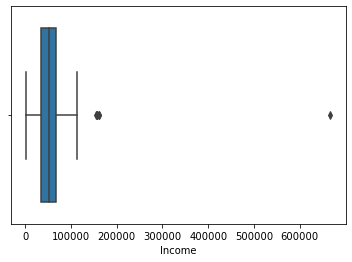

In [155]:
import seaborn as sb
sb.boxplot(dfset['Income'])

#### REMOVING OUTLIER ####

In [156]:
dfset1 = dfset[~(dfset['Spending']> 2250)]
dfset1

,Income,Spending,Seniority
0,58138.0,1529,25.333333
1,46344.0,21,7.000000
2,71613.0,734,13.633333
3,26646.0,48,7.866667
4,58293.0,407,8.600000
...,...,...,...
2235,61223.0,1094,15.933333
2236,64014.0,436,3.866667
2237,56981.0,1217,8.400000
2238,69245.0,782,8.433333


In [157]:
dfset2 = dfset1[~(dfset['Income']> 125000)]
dfset2

,Income,Spending,Seniority
0,58138.0,1529,25.333333
1,46344.0,21,7.000000
2,71613.0,734,13.633333
3,26646.0,48,7.866667
4,58293.0,407,8.600000
...,...,...,...
2235,61223.0,1094,15.933333
2236,64014.0,436,3.866667
2237,56981.0,1217,8.400000
2238,69245.0,782,8.433333


In [158]:
max(dfset['Income'])

666666.0

In [159]:
from sklearn.cluster import KMeans

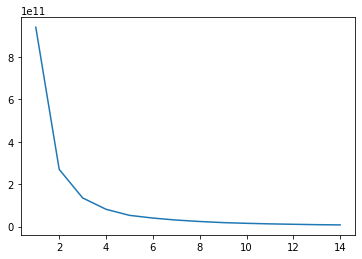

In [160]:
a=[]

for i in range(1,15):
    kmeans=KMeans(i)
    kmeans.fit(dfset2)
    a.append(kmeans.inertia_)
plt.plot(range(1,15),a)

In [161]:
kmeans=KMeans(3)
kmeans.fit(dfset2)

KMeans(n_clusters=3)

In [162]:
clusters=dfset2.copy()
clusters["Customer_Based_Segmentation"]=kmeans.predict(dfset2)
clusters

,Income,Spending,Seniority,Customer_Based_Segmentation
0,58138.0,1529,25.333333,2
1,46344.0,21,7.000000,2
2,71613.0,734,13.633333,0
3,26646.0,48,7.866667,1
4,58293.0,407,8.600000,2
...,...,...,...,...
2235,61223.0,1094,15.933333,2
2236,64014.0,436,3.866667,0
2237,56981.0,1217,8.400000,2
2238,69245.0,782,8.433333,0


In [163]:
# The clusters are equally weighted :
# - __Cluster 0__ is composed of __old customers__ with __high income__ and __high spending amount__<br>
# - __Cluster 1__ is composed of __new customers__ with __below average income__ and __small spending amount__<br>
# - __Cluster 2__ is composed of __new customers__ with __high income__ and __high spending amount__<br>
# - __Cluster 3__ is composed of __old customers__ with __below average income__  and __small spending amount__<br>

In [164]:
clusters["Customer_Based_Segmentation"].unique()

array([2, 0, 1], dtype=int32)

In [165]:
x_indep=clusters.drop(["Customer_Based_Segmentation"], axis=1)
x_indep

,Income,Spending,Seniority
0,58138.0,1529,25.333333
1,46344.0,21,7.000000
2,71613.0,734,13.633333
3,26646.0,48,7.866667
4,58293.0,407,8.600000
...,...,...,...
2235,61223.0,1094,15.933333
2236,64014.0,436,3.866667
2237,56981.0,1217,8.400000
2238,69245.0,782,8.433333


In [166]:
y_dep=clusters.Customer_Based_Segmentation
y_dep

0       2
1       2
2       0
3       1
4       2
       ..
2235    2
2236    0
2237    2
2238    0
2239    2
Name: Customer_Based_Segmentation, Length: 2226, dtype: int32

In [167]:
counter=Counter(y_dep)
counter

Counter({2: 786, 0: 709, 1: 731})

In [168]:
# from imblearn.over_sampling import SMOTE
# # bal=SMOTE()

In [169]:
# x_idep, y_dep= bal.fit_resample(x_indep, y_dep)

In [170]:
# y_dep.value_counts()

In [171]:
from sklearn.model_selection import train_test_split

In [172]:
x_train,x_test,y_train,y_test = train_test_split(x_indep,y_dep, test_size=0.2)

In [173]:
from sklearn.linear_model import LogisticRegression

In [174]:
model=LogisticRegression()
modelfit = model.fit(x_train,y_train)

In [175]:
Predict_model0=modelfit.predict(x_test)
confusion_matrix(y_test,Predict_model0)
lr_acc=(accuracy_score(y_test,Predict_model0)*100,"%")
lr_acc

(71.74887892376681, '%')

In [176]:
from sklearn import preprocessing

In [177]:
from sklearn.ensemble import GradientBoostingClassifier

In [178]:
from sklearn.model_selection import GridSearchCV

In [179]:
model_GB = GradientBoostingClassifier()

In [180]:
gbm = GridSearchCV(model_GB,
                     param_grid = {'max_depth': range(1, 15),
                                  'min_samples_split': range(1, 11, 3)},
                     cv=5,
                     n_jobs=-1,
                     scoring='accuracy', 
#                    refit=True,
                  )
                      
gbm.fit(x_train, y_train)

print(gbm.best_params_)
print(gbm.best_score_)

{'max_depth': 1, 'min_samples_split': 4}
1.0


In [181]:
# Initiate the best model
model_GB = GradientBoostingClassifier(max_depth=1, min_samples_split=4)

In [182]:
# Fit the best model
model_GB_fit=model_GB.fit(x_train, y_train)

In [183]:
Predict_model1 = model_GB_fit.predict(x_test)

In [184]:
confusion_matrix(y_test,Predict_model1)

array([[126,   0,   0],
       [  0, 158,   0],
       [  0,   0, 162]])

In [185]:
gbm_acc=(accuracy_score(y_test,Predict_model1)*100,"%")
gbm_acc

(100.0, '%')

In [186]:
classification_reports=print(classification_report(y_test,Predict_model1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       126
           1       1.00      1.00      1.00       158
           2       1.00      1.00      1.00       162

    accuracy                           1.00       446
   macro avg       1.00      1.00      1.00       446
weighted avg       1.00      1.00      1.00       446



In [187]:
dfset['Seniority'].head(50).unique().round()

array([25.,  7., 14.,  8.,  9., 13., 23., 17., 16.,  7., 11., 24., 23.,
       22., 25., 18., 23., 26., 21., 22.,  9., 19., 21., 16., 20., 16.,
       11.,  4., 17., 24., 13.,  9., 13.,  8., 20., 17., 19., 11., 12.,
        3., 23., 17.,  9., 23.])

In [188]:
import gradio as gd

In [189]:
Income = gd.inputs.Dropdown([58138.        , 46344.        , 71613.        , 26646.        ,
       58293.        , 62513.        , 55635.        , 33454.        ,
       30351.        ,  5648.        , 52247.25135379,  7500.        ,
       63033.        , 59354.        , 17323.        , 82800.        ,
       41850.        , 37760.        , 76995.        , 33812.        ,
       37040.        ,  2447.        , 58607.        , 65324.        ,
       40689.        , 18589.        , 53359.        , 38360.        ,
       84618.        , 10979.        , 38620.        , 40548.        ,
       46610.        , 68657.        , 49389.        , 67353.        ,
       23718.        , 42429.        , 48948.        , 80011.        ,
       20559.        , 21994.        , 79941.        , 41728.        ,
       72550.       ],label='Income')

In [190]:
Spending = gd.inputs.Dropdown([1529,   21,  734,   48,  407,  702,  563,  146,   44,   36,   18,
         45, 1072,  296,   41, 1270,   92,  289, 1606,   94,  268, 1729,
        953,  539,  345,   62,  216,  275,  121, 1672,   26,  229,  117,
        259, 1174,  878,   63,  860, 1293,   46,   19,  147,  810,   72,
         42, 1281],label='Spending')

In [191]:
Seniority = gd.inputs.Dropdown([25.,  7., 14.,  8.,  9., 13., 23., 17., 16.,  7., 11., 24., 23.,
       22., 25., 18., 23., 26., 21., 22.,  9., 19., 21., 16., 20., 16.,
       11.,  4., 17., 24., 13.,  9., 13.,  8., 20., 17., 19., 11., 12.,
        3., 23., 17.,  9., 23.],label='Seniority')

In [194]:
def mod(Income,Spending,Seniority):
    x1 = [Income,Spending,Seniority]
    test=dfset
    x1 =pd.DataFrame(np.array(x1).reshape(1,-1),columns=test.columns)
    test = test.append(x1,ignore_index = True)
    x2 = test.iloc[-1,:]
    y_hat =  model_GB_fit.predict(np.array(x2).reshape(1,-1))
    pred={2:"Platinum", 1:"Gold", 0:"Silver"}
    return pred[y_hat[0]]

In [195]:
gd.Interface(mod, [Income,Spending,Seniority],
             gd.outputs.Textbox(label='Customer Segment')).launch()

Running locally at: http://127.0.0.1:7866/
To create a public link, set `share=True` in `launch()`.
Interface loading below...


(<Flask 'gradio.networking'>, 'http://127.0.0.1:7866/', None)